In [26]:
import folium
import pandas as pd
import sklearn as np

In [27]:
my_map = [0,0]
m = folium.Map(location=my_map,zoom_start=2)
m.save('first.html')
m

In [ ]:
my_map

In [40]:
df = pd.read_csv('C:\\Users\\folak\\Downloads\\Indicators.csv')
country_geo = 'C:\\Users\\folak\\Downloads\\world-countries.json'
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [46]:
df.value_counts()

CountryName  CountryCode  IndicatorName                                              IndicatorCode         Year  Value        
Zimbabwe     ZWE          Youth literacy rate, population 15-24 years, male (%)      SE.ADT.1524.LT.MA.ZS  2011   8.959058e+01    1
Germany      DEU          Net current transfers from abroad (current LCU)            NY.TRF.NCTR.CN        1982  -5.720821e+09    1
                                                                                                           1974  -4.004573e+09    1
                                                                                                           1975  -4.206055e+09    1
                                                                                                           1976  -4.533486e+09    1
                                                                                                                                 ..
Nicaragua    NIC          PPG, multilateral (DIS, current US$)                   

In [29]:
mask1 = df['IndicatorName'].str.contains('Life expectancy at birth')
mask2 = df['Year'].isin([2013])

In [30]:
stage = df[mask1&mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377669,Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,72.536117
5377670,Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2013,68.848383
5377671,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,70.631305
5378129,Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,74.757382
5378130,Caribbean small states,CSS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2013,69.183365


In [31]:
data_plot = stage[['CountryCode','Value']]
data_plot.head()

,CountryCode,Value
5377669,ARB,72.536117
5377670,ARB,68.848383
5377671,ARB,70.631305
5378129,CSS,74.757382
5378130,CSS,69.183365


In [32]:
hist_indicator = stage.iloc[0]['IndicatorName']

In [33]:
map = folium.Map(location=[100,0], zoom_start=0.5)

map.choropleth(geo_data = country_geo, data = data_plot, columns=['CountryCode','Value'],
              key_on='feature.id', fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
              legend_name=hist_indicator)

C:\Users\folak\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [34]:
map.save('data_plot.html')

In [35]:
from IPython.display import HTML
HTML('<iframe src=data_plot.html width=700 height=450></iframe>')

C:\Users\folak\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [47]:
df.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

<AxesSubplot:xlabel='CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value'>

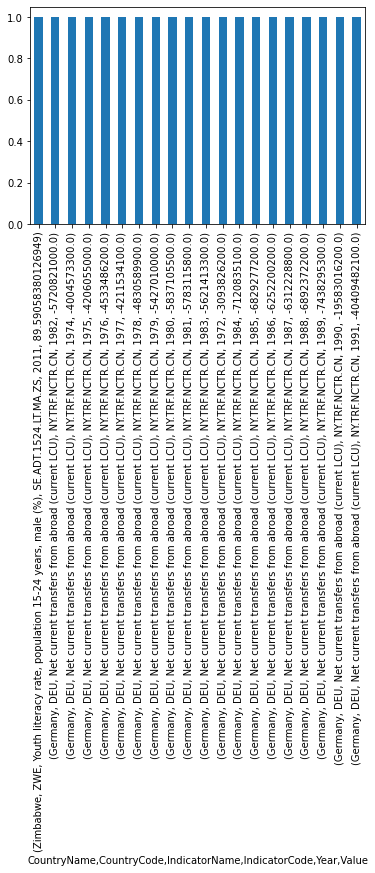

In [49]:
df.value_counts()[:20].plot(kind="bar")